# CV ASSIGNMENT 1
## YASHASHWINI GUPTA (yg1568)

# A) Theoretical questions:

### A1) Image formation:

A professional full-frame digital camera uses an image size of 36mm x 36mm and standard focal length
of 50mm. Let us say that the square sensor provide 16 megapixels. Now you buy smartphone with a 16
megapixel sensor (assuming a square image too), but given a focal length of 4mm so that the phone fits
into your pocket.

• Using the pinhole camera projection equation, calculate the size of the light-sensitive image
sensor of your smart-phone. Calculate the ratio of this size relative to the professional camera
sensor size.

#### ANSWER: 

Let us assume,
Length of professional camera sensor as $l_{2}$ = 36mm
Focal length of professional camera as $f_{1}$ = 50mm
Focal length of phone camera as $f_{2}$ = 4mm.
By the formula,

   x/f =X/Z 

Hence,

   36 / 50 = $l_{2}$ / 4

Hence, length of phone camera sensor $l_{2}$ = 2.88 mm.

Assuming that the camera sensor is square, size of the camera sensor will be $(2.88)^{2}$ $mm^{2}$.
That is, 8.29 $mm^{2}$

Ratio of sizes of camera sensors = 8.29/$36^{2}$ = 1 : 156.25

• Calculate the size of a sensor pixel element for the professional and your smart-phone cameras.
Provide a short discussion of eventual advantages/disadvantages of your resulting measures,
and reasons why some professionals or amateurs favor more expensive large cameras.


#### ANSWER: 

Size of pixel = Size of sensor/ Number of pixels

Hence, size of pixel in professional camera = $36^{2}$ /(16 x $10^{6}$) $mm^{2}$. That is, 81 x $10^{-6}$ $mm^{2}$.

Size of pixel in phone camera = $2.88^{2}$/(16 x $10^{6}$) $mm^{2}$. That is, 0.52 x $10^{-6}$ $mm^{2}$.


Two advantages of professional cameras-

1) With the pixel size for large cameras being greater than that of the smartphone camera, the image quality does not degrade on zooming. The information stored per pixel in a professional camera is greater than that of a smartphone.

2) The number of photons received per pixel in a professional camera is greater. Hence, the raw image is of a better quality.

Two disadvantages of professional cameras-

1) The professional cameras are large and bulky. They are really expensive in comparison.

2) It is also very difficult to set the specifications and settings in a Professional cameras and are not easy to use.

 • Calculate the storage requirement assuming storage of raw images with color RGB channels, for
both cameras. 

#### ANSWER: 

As there are 3 channels Red, blue and green, each requiring 8 bits to represent theintensity, the total number of bits required per pixel is 24 bits or 3 bytes.

Hence, total storage space required for a 16 MP photo is 16 * 3 MB = 48 Megabytes.

### A2) Connectivity foreground/background 

One solution to digitization paradoxes is to mix connectivities. Using 8-neighborhood for foreground and
4-neighborhood for background, examine the paradoxes shown in the book (Fig. 2.7). Discuss the
number of components of fore- versus background given this choice. Also discuss the #of components
when either using 4-n (and also 8-n) for both fore- and background, and when reversing the notion and
using 8-n for background and 4-n for foreground. You can discuss in words and also include sketches of
your thoughts to this section. 

<img src="SampleImages/fig2_7.png">

#### ANSWER: 

Solution for Fig (a):

Using 8 Neighbourhood on foreground all the black pixels are connected to each other and hence is one single component.

Using 8 Neighbourhood on Background all the white pixels are connected to each other and hence is one single component.

Using 4 Neighbourhood on foreground all the black pixels are not connected to each other except the four pixels together in a square and hence there are 25 components.

Using 4 Neighbourhood on background all the white pixels are connected to each other and hence is one single component.

Solution for Fig (b):

Using 8 Neighbourhood on foreground all the black pixels are connected to each other and hence is one single component.

Using 8 Neighbourhood on background all the white pixels are connected to each other and hence is one single component.

Using 4 Neighbourhood on foreground all the black pixels are not connected to each other except the four pixels together in a square and hence there are 11 components.

Using 4 Neighbourhood on background all the white pixels are not connected to each other and there are two components.

### A3) Histogram equalization

Remember the main goal of histogram equalization to result in a uniform intensity distribution
(histogram). Below you see the images from the book referring to image equalization. Explain why the
histogram of a discrete image is not flat after histogram equalization. (Hint: You may first work on the
practical part to get a closer insight). 

<img src="SampleImages/im.png">

#### ANSWER: 

The histogram of a discrete image after equalization is merely a remapping of the intensity values. The intensity values are not redistributed and the number of values in a given range is maintained. If the intensity values are redistributed then is it possible to achieve a flat histogram. But histogram equalization does not perform any redistribution. Pixels which map to a certain intensity level x will all map to the intensity level y after global equalization.



# B) Practical programming assignments:

### B1) Compute a Histogram and CDF

Write code that reads a 2D image as input and returns a 1D array of the relative frequencies of occurrence of greylevels in your image. Provide a choice for quantizing a binning of the greylevels into n quantized bins between 0 and the maximum value (please remember that for an 8bit image, this is the range 0 … 255 for the range 0 … L-1).

• Calculate the histogram of an image of your choice, please note that a color image first needs to be converted into black-and-white.

• Normalize the histogram by the image size to present a probability density function (pdf), plot the pdf.

• Calculate the cumulative distribution function CDF from your pdf and plot the function.

• Creatively experiment with a second image that may show different structures.

• Write a short report that shows the original images, and the corresponding pdf and CDF plots.

Provide a short discussion if the shape of the histograms that may reflect some of the visible properties of the image, and discuss differences between results from the two images.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load an color image in grayscale
img1 = cv2.imread('SampleImages/Cameraman.tif',0)
img2 = cv2.imread('SampleImages/Berries.jpg',0)

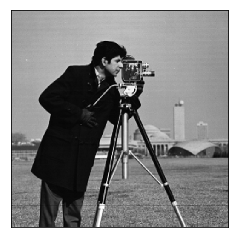

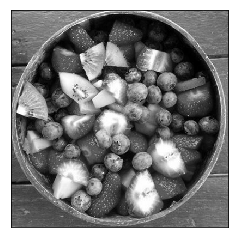

In [3]:
plt.imshow(img1, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img2, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [4]:
nbins=int(input("What is your desired bin size (range 1,256) ") or "256")

What is your desired bin size (range 1,256) 64


In [5]:
def create_histogram(image_name):
    img_vals= np.zeros(256)
    for i in range(0,image_name.shape[0]):
        for j in range(0,image_name.shape[1]):
            intensity= image_name[i][j]
            img_vals[intensity]=img_vals[intensity]+1
    
    hist_vals= np.zeros(nbins)
    for i in range(0,nbins):
        x= int(i*256/nbins)
        for j in range(x, x+int(256/nbins)):
            hist_vals[i]= hist_vals[i]+ img_vals[j]
    return hist_vals        

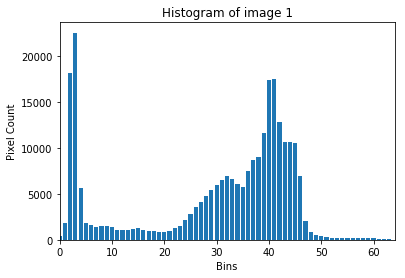

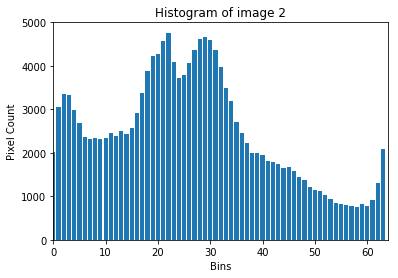

In [6]:
plt.bar(range(0,nbins), height=create_histogram(img1))
plt.xlim([0,nbins])
plt.title('Histogram of image 1')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

plt.bar(range(0,nbins), height=create_histogram(img2))
plt.xlim([0,nbins])
plt.title('Histogram of image 2')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

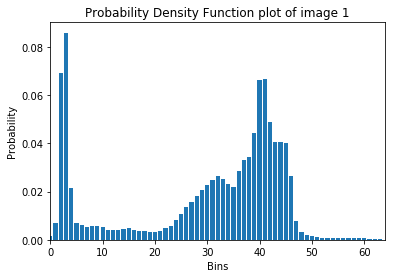

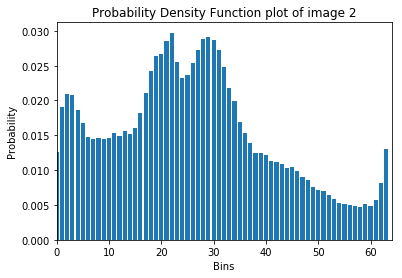

In [7]:
#Probability Density Function plot of image1
pdf1=create_histogram(img1)/img1.size
plt.bar(range(0,nbins), height=pdf1)
plt.xlim([0,nbins])
plt.title('Probability Density Function plot of image 1')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

#Probability Density Function plot of image2
pdf2=create_histogram(img2)/img2.size
plt.bar(range(0,nbins), height=pdf2)
plt.xlim([0,nbins])
plt.title('Probability Density Function plot of image 2')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

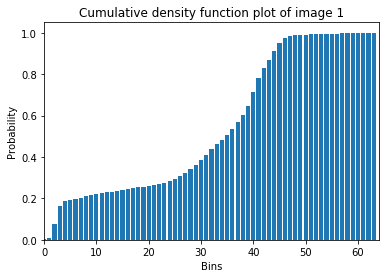

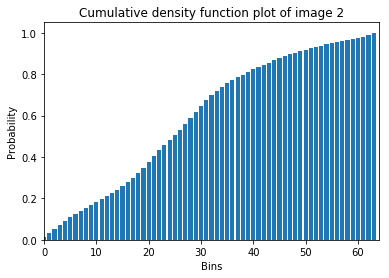

In [8]:
#Cumulative density function plot of image1
cdf1 = pdf1.cumsum()
plt.bar(range(0,nbins), height=cdf1)
plt.xlim([0,nbins])
plt.title('Cumulative density function plot of image 1')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

#Cumulative density function plot of image2
cdf2 = pdf2.cumsum()
plt.bar(range(0,nbins), height=cdf2)
plt.xlim([0,nbins])
plt.title('Cumulative density function plot of image 2')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

Provide a short discussion if the shape of the histograms that may reflect some of the visible
properties of the image, and discuss differences between results from the two images.

#### ANSWER: 

The shape of the histogram shows statistical distribution of intensity values. It shows how the intensity levels are distributed accross the levels and can be used to identify what kind of operation is required to enhance and extract information from the image. For example, if there might be a bimodal distribution in the histogram, thresholding can be used to differentiate the foreground and the background. If the shape of the histogram is densely populated over a range, applying histogram equalization can help increase the contrast and improve the image quality.

In the above example, I used two images-berries and cameraman and computed the histogram,pdf and cdf for both images.While image2(Cameraman) was more populated towards lower and mean intensity values image1(berries) was more evenly distributed in comparision. Hence, cdf of image 1 showed a smooth and gradual rise in the cdf plot as compared to image 2.


### B2) Histogram Equalization

 Use the histogram code as developed above, and provide an additional function for histogram equalization.

• Follow instructions as in the book and course notes to calculate the histogram, pdf, CDF and then a binning of the frequency axis into n bins that determines the mapping of intensities to form a uniform distribution.

• Apply your histogram equalization code to the images used before. Calculate and plot the new histogram after equalization.

• Add an additional section to the report by showing images, pdf’s and CDF’s before/after equalization. Briefly discuss what you see in the histogram equalized images and the corresponding plots of pdf’s and CDF’s. 

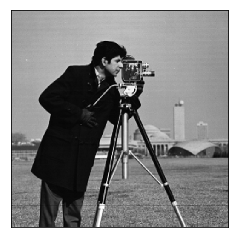

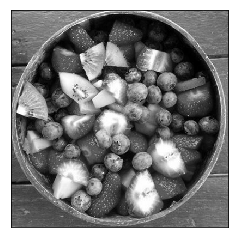

In [9]:
img1 = cv2.imread('SampleImages/Cameraman.tif',0)
img2 = cv2.imread('SampleImages/Berries.jpg',0)
plt.imshow(img1, cmap = 'gray')
nbins=256

plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img2, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [10]:
img_eq1=img1.copy()
cumulative1 = np.cumsum(create_histogram(img_eq1)) / img_eq1.size * 255

img_eq2=img2.copy()
cumulative2= np.cumsum(create_histogram(img_eq2)) / img_eq2.size * 255

In [11]:
for i in range(img_eq1.shape[0]):
    for j in range(img_eq1.shape[1]):
        img_eq1[i][j] = cumulative1[img1[i][j]]
        
for i in range(img_eq2.shape[0]):
    for j in range(img_eq2.shape[1]):
        img_eq2[i][j] = cumulative2[img2[i][j]]        

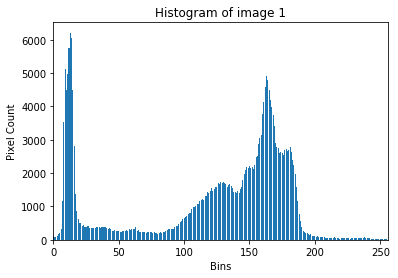

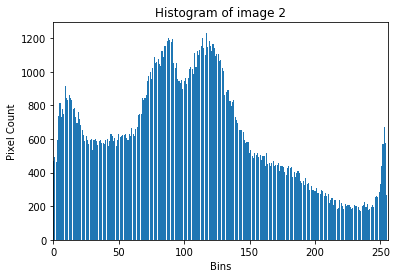

In [12]:
plt.bar(range(0,nbins), height=create_histogram(img1))
plt.xlim([0,nbins])
plt.title('Histogram of image 1')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()
       
plt.bar(range(0,nbins), height=create_histogram(img2))
plt.xlim([0,nbins])
plt.title('Histogram of image 2')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()


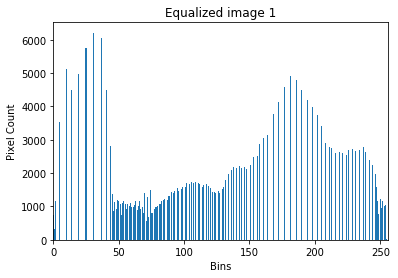

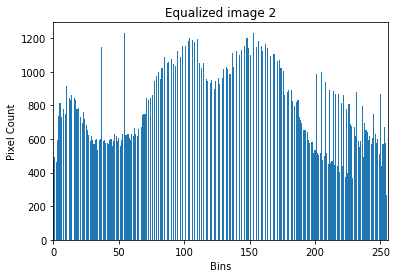

In [13]:
plt.bar(range(0,256), height= create_histogram(img_eq1))
plt.xlim([0,nbins])
plt.title('Equalized image 1')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

plt.bar(range(0,256), height= create_histogram(img_eq2))
plt.xlim([0,nbins])
plt.title('Equalized image 2')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

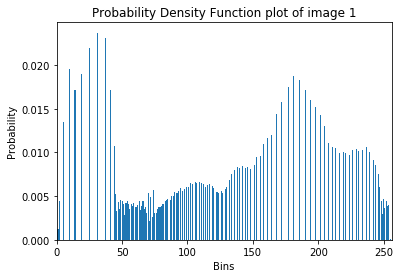

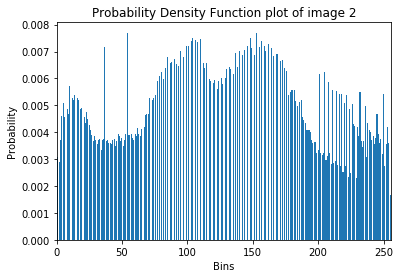

In [14]:
pdf1=create_histogram(img_eq1)/img_eq1.size
plt.bar(range(0,nbins), height=pdf1)
plt.xlim([0,nbins])
plt.title('Probability Density Function plot of image 1')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

#Probability Density Function plot of image2
pdf2=create_histogram(img_eq2)/img_eq2.size
plt.bar(range(0,nbins), height=pdf2)
plt.xlim([0,nbins])
plt.title('Probability Density Function plot of image 2')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

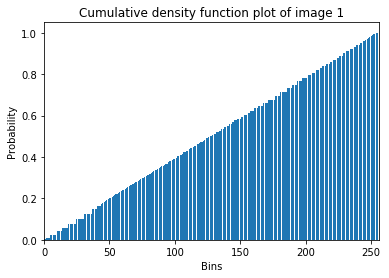

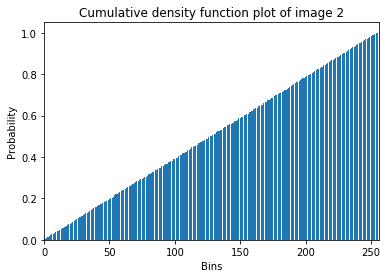

In [15]:
cdf1 = pdf1.cumsum()
plt.bar(range(0,nbins), height=cdf1)
plt.xlim([0,nbins])
plt.title('Cumulative density function plot of image 1')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

#Cumulative density function plot of image2
cdf2 = pdf2.cumsum()
plt.bar(range(0,nbins), height=cdf2)
plt.xlim([0,nbins])
plt.title('Cumulative density function plot of image 2')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

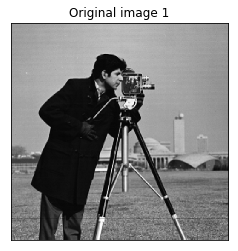

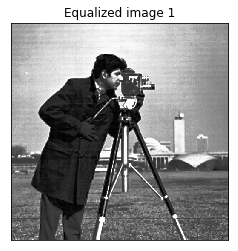

In [16]:
plt.imshow(img1, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('Original image 1')
plt.show()

plt.imshow(img_eq1, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('Equalized image 1')
plt.show()

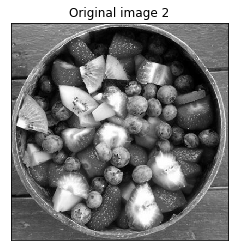

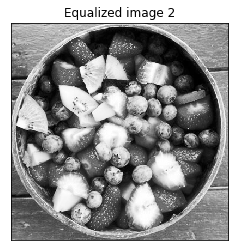

In [17]:
plt.imshow(img2, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('Original image 2')
plt.show()

plt.imshow(img_eq2, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('Equalized image 2')
plt.show()

Briefly discuss what you see in the histogram equalized images and the
corresponding plots of pdf’s and CDF’s

#### ANSWER: 

The equalization of the image improves the distribution of the instensity values in the histogram plots and probabilty density function plots for image 1 and image 2. However, cdf for the images has very little difference after equalization. The contrasts of the images is greatly improved after equalization. The intensity values are redistributed to generate an image with enhanced dynamic range and contrast. 

### B3) Histogram Matching

Following the course notes, develop code that maps intensity values of a preferably bad image into intensity distribution of a good looking image.

• Select an image with somewhat poor contrast or visibility of structures. Select a second image
which looks good.

• Calculate histograms, pdf’s, CDF’s of both images. Follow course instructions to map the
intensity distributions of the first image into those of the second image (histogram matching).

• Add a section to the report that shows original images and plots of pdf’s and CDF’s. Then show
the results of the adjusted first image, and its pdf and CDF’s.

• Provide a short discussion of what you see and if the procedure resulted in the anticipated
result.


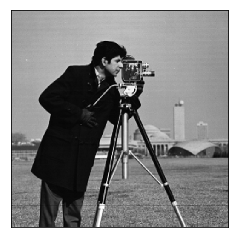

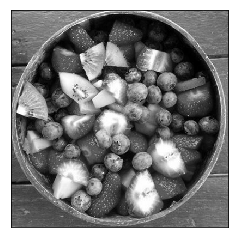

In [18]:
img1 = cv2.imread('SampleImages/Cameraman.tif',0)
img2 = cv2.imread('SampleImages/Berries.jpg',0)

plt.imshow(img1, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img2, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

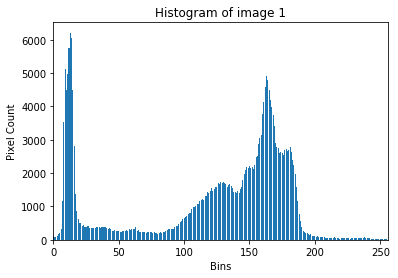

In [19]:
hist_vals1=create_histogram(img1)

plt.bar(range(0,nbins), height=hist_vals1)
plt.xlim([0,nbins])
plt.title('Histogram of image 1')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

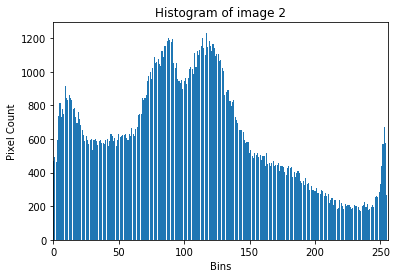

In [20]:
hist_vals2=create_histogram(img2)

plt.bar(range(0,nbins), height=hist_vals2)
plt.xlim([0,nbins])
plt.title('Histogram of image 2')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

In [21]:
s_values, bin_idx, s_counts = np.unique(img1, return_inverse=True,return_counts=True)
t_values, t_counts = np.unique(img2, return_counts=True)

s_quantiles = np.cumsum(s_counts).astype(np.float64)
s_quantiles /= s_quantiles[-1]
t_quantiles = np.cumsum(t_counts).astype(np.float64)
t_quantiles /= t_quantiles[-1]

interp_vals = np.interp(s_quantiles, t_quantiles, t_values)
interp_vals=interp_vals[bin_idx].reshape(img1.shape)

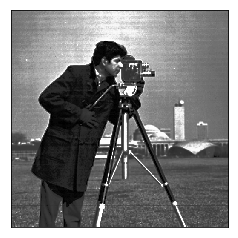

In [22]:
plt.imshow(interp_vals, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

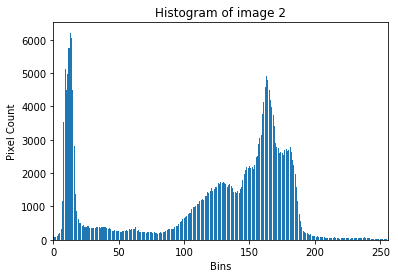

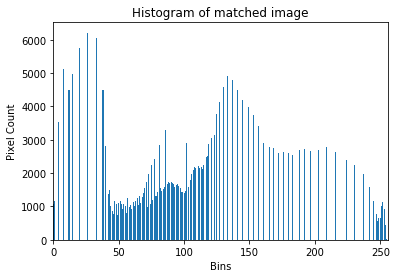

In [23]:
plt.bar(range(0,nbins), height=create_histogram(img1))
plt.xlim([0,nbins])
plt.title('Histogram of image 2')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

plt.bar(range(0,nbins), height=create_histogram(interp_vals.astype(int)))
plt.xlim([0,nbins])
plt.title('Histogram of matched image')
plt.xlabel('Bins')
plt.ylabel('Pixel Count')
plt.show()

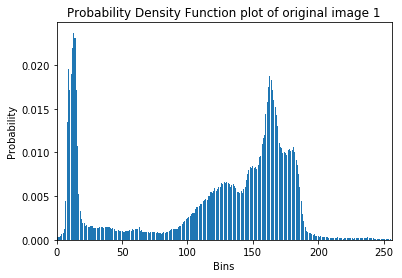

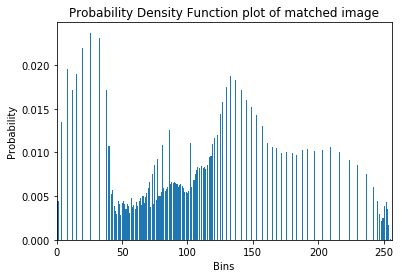

In [27]:
pdf1=create_histogram(img1)/img1.size
plt.bar(range(0,nbins), height=pdf1)
plt.xlim([0,nbins])
plt.title('Probability Density Function plot of original image 1')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

#Probability Density Function plot of image2
pdf2=create_histogram(interp_vals.astype(int))/interp_vals.size
plt.bar(range(0,nbins), height=pdf2)
plt.xlim([0,nbins])
plt.title('Probability Density Function plot of matched image')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

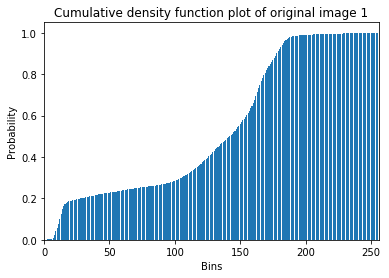

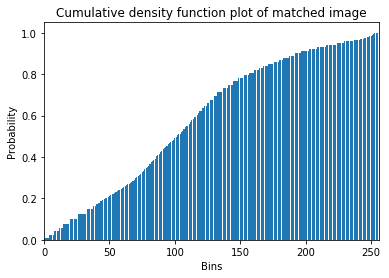

In [28]:
cdf1 = pdf1.cumsum()
plt.bar(range(0,nbins), height=cdf1)
plt.xlim([0,nbins])
plt.title('Cumulative density function plot of original image 1')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

#Cumulative density function plot of image2
cdf2 = pdf2.cumsum()
plt.bar(range(0,nbins), height=cdf2)
plt.xlim([0,nbins])
plt.title('Cumulative density function plot of matched image')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

Provide a short discussion of what you see and if the procedure resulted in the anticipated
result.

#### ANSWER: 

The matched image's histogram is of the similar shape as the original image(Cameraman) however it is redistributed in a way that the values and more distributed like that of the berries image. The matching introduces gaps in the histograms because of distortion. As expected the distribution is improved and the pixels with higher intensity levels become more prominent in the image.
